In [1]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import sklearn
%matplotlib inline

In [2]:
#Importing Data
more_metadata=pd.DataFrame.from_csv('Whole_mets.csv')
second_genome=pd.DataFrame.from_csv('second_genome_2.csv')
second_genome.index=second_genome.index.astype('float64')
print (second_genome.shape)
discovery_mets=pd.DataFrame.from_csv('data_discovery.csv')
discovery_mets.index=discovery_mets.index.astype('float64')
print (discovery_mets.shape)
more_metadata

(540, 667)
(399, 663)


,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylalanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylaspartate (NAA):scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.alanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.asparagine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.aspartate:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatinine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.guanidinoacetate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamine:scaled,...,root.metabolite.scaled.xenobiotics.xanthine_metabolism.paraxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theobromine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theophylline:scaled,BMI,vendor,sex,Age,shannon,PD_whole_tree,chao1
public_client_id,,,,,,,,,,,,,,,,,,,,,
1000261.0,-0.076985,0.023217,0.282955,0.168853,0.462975,0.549606,-0.088332,0.011021,0.218309,0.248472,...,-0.362281,-0.286292,0.282933,22.594123,1.0,0.0,49.0,4.264935,48.974,1494.859
1002183.0,0.020338,-0.257466,-0.170279,0.062775,0.118171,0.637990,-0.004724,-0.116968,0.416066,-0.214809,...,-0.959993,-1.492921,-3.098440,21.464379,1.0,0.0,67.0,4.221266,39.884,1162.367
1002412.0,-0.130509,-0.136306,-0.069702,-0.164965,0.039683,0.187988,-0.070374,-0.398941,-0.358748,-0.736966,...,-1.310661,-1.049218,-1.040605,NaN,1.0,0.0,52.0,4.484662,52.568,1446.976
1002471.0,0.022123,-0.069881,-0.076536,-0.161891,-0.424553,0.333207,-0.020054,-0.373684,-0.286269,-1.066862,...,0.243937,0.321572,0.218872,30.204082,NaN,0.0,55.0,NaN,NaN,NaN
1003114.0,-0.209712,0.183955,0.080276,-0.086723,0.393983,0.236349,-0.062802,-0.447281,-0.383410,-1.180114,...,0.096275,-0.773674,-0.238451,26.568405,1.0,0.0,65.0,4.181064,45.069,1201.782
1004596.0,0.079688,0.202643,0.129602,0.156963,-0.301528,0.396067,-0.072455,0.249550,0.469559,0.033169,...,0.453692,-0.701961,0.401027,23.685059,0.0,0.0,62.0,3.446328,30.911,815.964
1004760.0,0.090744,0.183236,-0.088388,0.003788,0.061606,-0.320830,0.006032,0.011048,0.224619,-0.038004,...,0.167893,1.137287,-0.177840,24.140479,1.0,0.0,60.0,5.046111,62.772,1735.421
1005890.0,0.090716,0.050820,-0.051633,0.048204,0.440860,-0.962824,0.173663,0.306232,0.044061,-0.010716,...,0.327552,1.985079,0.044855,23.078283,1.0,1.0,42.0,3.912816,37.272,1105.728
1008612.0,0.001082,0.032689,-0.301925,-0.196911,-0.240342,-0.455304,0.006381,-0.371401,0.018558,0.009633,...,-1.022768,-0.195004,-1.246490,28.858845,0.0,0.0,30.0,4.248299,31.044,820.527


# Discovery Cohort Analysis Figure 2

(399, 659)
Axes(0.125,0.125;0.775x0.775)


,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylalanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.N-acetylaspartate (NAA):scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.alanine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.asparagine:scaled,root.metabolite.scaled.amino_acid.alanine_and_aspartate_metabolism.aspartate:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.creatinine:scaled,root.metabolite.scaled.amino_acid.creatine_metabolism.guanidinoacetate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamate:scaled,root.metabolite.scaled.amino_acid.glutamate_metabolism.N-acetylglutamine:scaled,...,root.metabolite.scaled.xenobiotics.xanthine_metabolism.1-methylxanthine:scaled,"root.metabolite.scaled.xenobiotics.xanthine_metabolism.3,7-dimethylurate:scaled",root.metabolite.scaled.xenobiotics.xanthine_metabolism.3-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-amino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.5-acetylamino-6-formylamino-3-methyluracil:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.7-methylxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.caffeine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.paraxanthine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theobromine:scaled,root.metabolite.scaled.xenobiotics.xanthine_metabolism.theophylline:scaled
public_client_id,,,,,,,,,,,,,,,,,,,,,
1004596.0,0.833218,0.761784,0.843610,1.256685,-0.162537,0.923467,-0.144530,0.766014,1.632376,0.645173,...,1.558918,-0.341156,0.394720,1.437934,0.834019,0.476340,-0.209969,0.796869,-0.213886,0.682462
1008612.0,0.304530,-0.108953,-1.244047,-0.869363,0.001267,-0.688200,0.491214,-0.494130,0.309377,0.593595,...,-1.046633,0.964223,0.666760,0.249349,0.056610,1.121009,-1.838136,-0.810097,0.298179,-0.803747
1009390.0,0.369553,1.268356,-0.266620,1.645854,-0.768815,0.277064,0.048680,0.076867,-0.578170,0.070755,...,-2.461265,0.533472,0.782458,-1.871884,-1.021436,0.456812,-0.818074,-2.424611,1.198634,-1.098684
1015440.0,-0.752913,0.157074,0.119658,-1.796677,0.729422,0.383756,-0.908895,-2.846540,-0.838363,0.061962,...,0.212080,-0.466614,-0.240078,0.255472,0.154972,-0.507446,0.523786,0.160878,-3.479483,0.288964
1018937.0,-0.648394,-0.428250,-1.908256,-0.321339,0.069634,-0.053452,0.035033,-2.197490,-1.941953,-1.525577,...,-0.287845,-2.280471,-1.154523,-0.786325,-0.509408,-1.595787,-1.163865,-0.807561,-1.194126,-0.642469


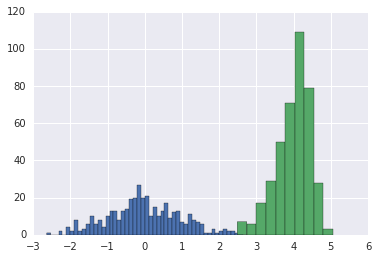

In [3]:
regression_analysis=discovery_mets.drop(['sex','PD_whole_tree','chao1'],1)
#Scale and standardize metabolites
X = regression_analysis.loc[:,regression_analysis.columns!='shannon']
y = (regression_analysis['shannon'])
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Xcolumns=X.columns
Xindex=regression_analysis.index
X = scaler.fit_transform(X)
X=pd.DataFrame(data=X,columns=Xcolumns,index=regression_analysis.index)
print (X.shape)
sns.set(font_scale=1.00)
print (X['root.metabolite.scaled.lipid.steroid.5alpha-androstan-3beta,17alpha-diol disulfate:scaled'].hist(bins=50))
plt.hist(y)
X.head()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


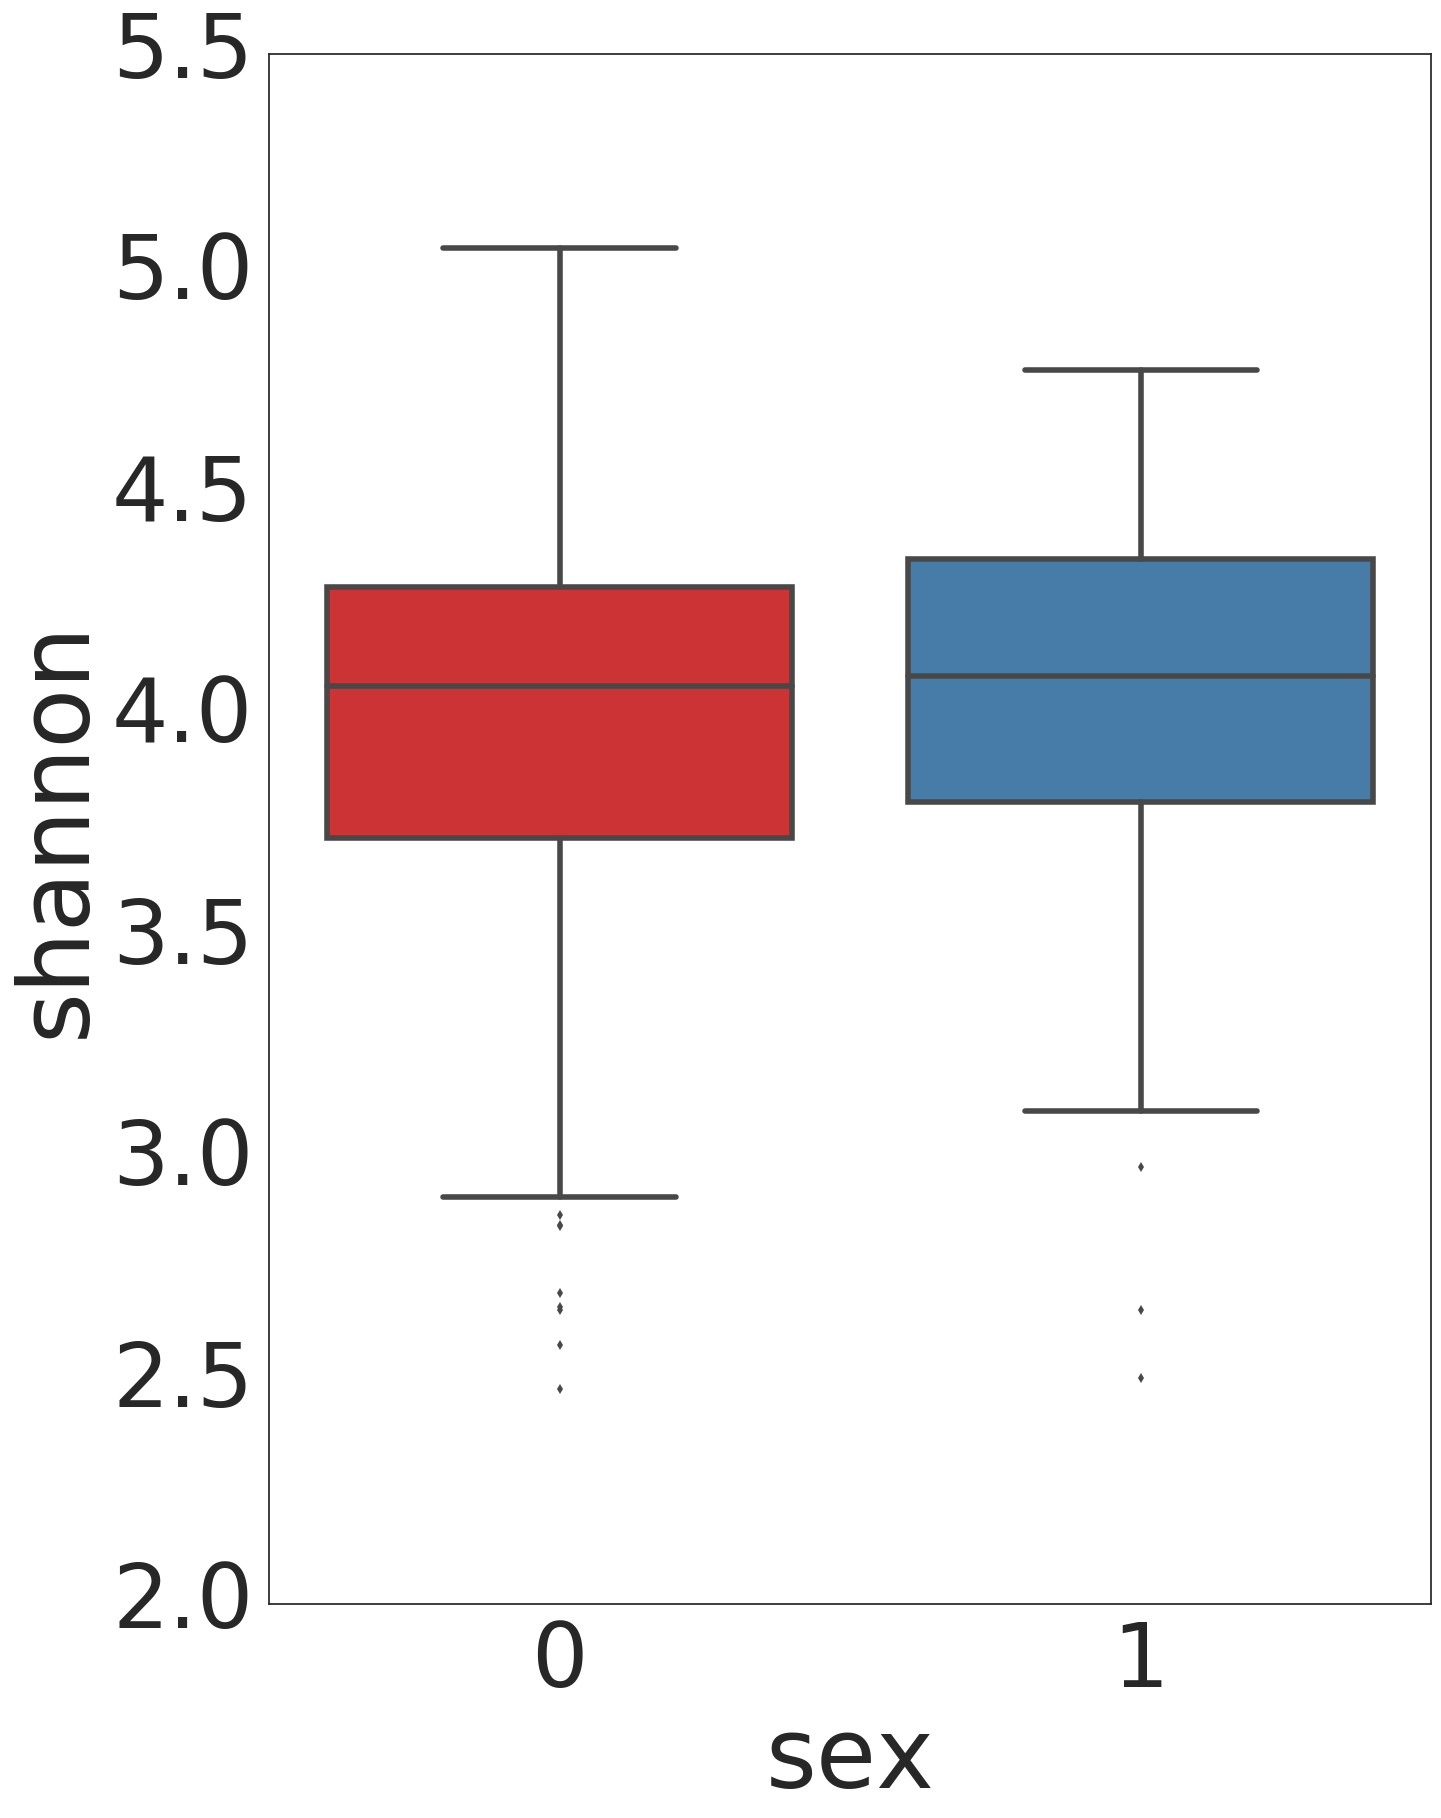

In [4]:
discovery_mets['_5alpha']=X['root.metabolite.scaled.lipid.steroid.5alpha-androstan-3beta,17alpha-diol disulfate:scaled']
discovery_mets['Age']=more_metadata['Age']
discovery_mets['BMI']=more_metadata['BMI']
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[15,20], dpi=100)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
plt.ylim(2,5.5)
meanlineprops = dict(linestyle='-', linewidth=3, color='Red')
ax=sns.boxplot(y=discovery_mets['shannon'],x=discovery_mets['sex'],order=[0,1], meanprops=meanlineprops,palette='Set1',showfliers=True,linewidth=4, meanline=True,showmeans=False)
#ax = sns.stripplot(x='Obesity', y='res', data=data_post, color="black",jitter=0.1, size=15)

In [5]:
#Statistical analysis of differences in shannon diversity across sex, adjusted for BMI and age.
results = smf.ols('shannon ~ BMI+Age+sex', data=discovery_mets).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                shannon   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     12.08
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.39e-07
Time:                        23:11:27   Log-Likelihood:                -232.44
No. Observations:                 399   AIC:                             472.9
Df Residuals:                     395   BIC:                             488.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3172      0.133     32.400      0.000       4.055       4.579
BMI           -0.0182      0.003     -5.671      0.000      -0.024      -0.012
Age            0.0039      0.002      1.801      0.072      -0.000       0.008
sex            0.0433      0.049      0.882      0.379      -0.053       0.140
==============================================================================
Omnibus:                       32.913   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.695
Skew:                          -0.723   Prob(JB):                     3.96e-09
Kurtosis:                       3.484   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

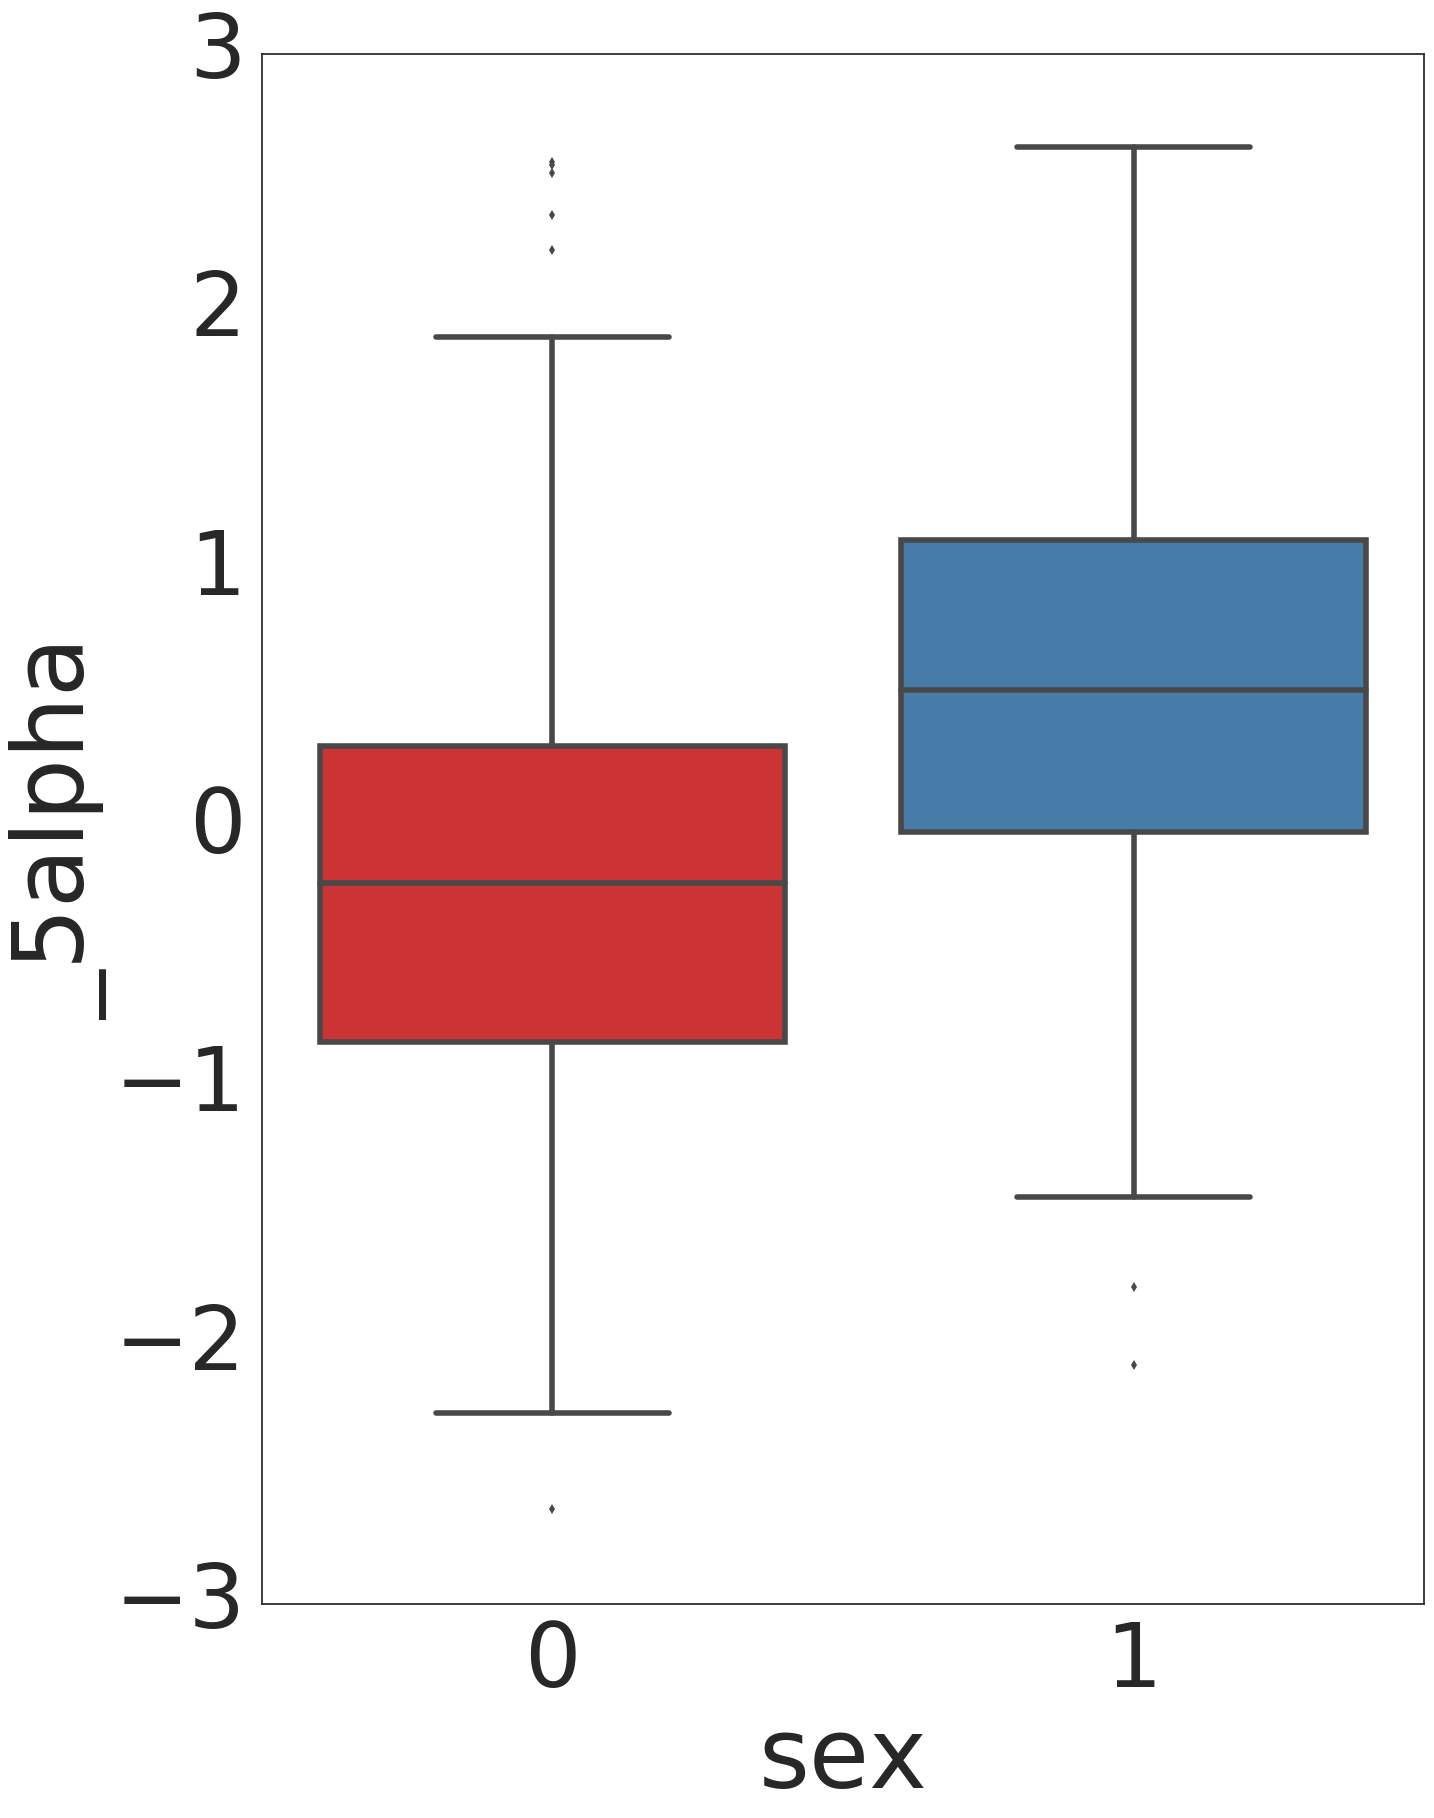

In [6]:
sns.set(font_scale=4.00,context='poster',font='Arial',style='white')
plt.figure(figsize=[15,20], dpi=100)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
meanlineprops = dict(linestyle='-', linewidth=3, color='Red')
ax=sns.boxplot(y=discovery_mets['_5alpha'],x=discovery_mets['sex'],order=[0,1], meanprops=meanlineprops,palette='Set1',showfliers=True,linewidth=4, meanline=True,showmeans=False)
#ax = sns.stripplot(x='Obesity', y='res', data=data_post, color="black",jitter=0.1, size=15)

In [7]:
#Statistical analysis of differences in 5alpha-androstan-3beta across sex, adjusted for BMI and age.
import statsmodels.formula.api as smf
results = smf.ols('_5alpha ~ BMI+Age+sex', data=discovery_mets).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                _5alpha   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     18.11
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           4.95e-11
Time:                        23:11:30   Log-Likelihood:                -540.44
No. Observations:                 399   AIC:                             1089.
Df Residuals:                     395   BIC:                             1105.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1951      0.288      0.677      0.499      -0.372       0.762
BMI           -0.0174      0.007     -2.514      0.012      -0.031      -0.004
Age            0.0023      0.005      0.488      0.626      -0.007       0.012
sex            0.6935      0.106      6.524      0.000       0.485       0.902
==============================================================================
Omnibus:                        1.120   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.929
Skew:                           0.106   Prob(JB):                        0.629
Kurtosis:                       3.103   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Figure 2C

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


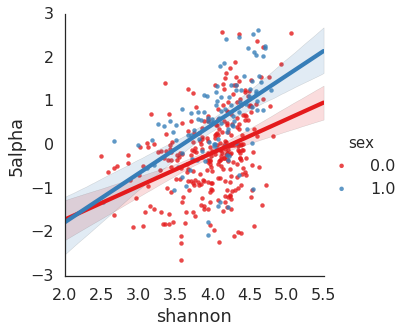

(0.41220589946424074, 8.471425863900576e-18)


In [8]:
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','_5alpha', discovery_mets,hue='sex',palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', '5alpha')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['_5alpha']))

# Figure 2D

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


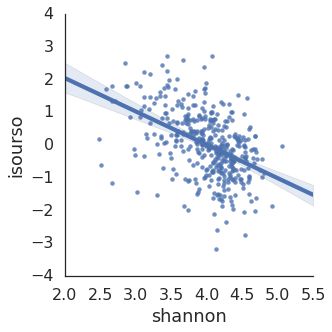

(-0.4609958660819048, 2.1801437608065734e-22)


In [9]:
discovery_mets['isourso']=X['root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.isoursodeoxycholate:scaled']
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','isourso', discovery_mets,palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', 'isourso')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['isourso']))

# Figure 2E

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


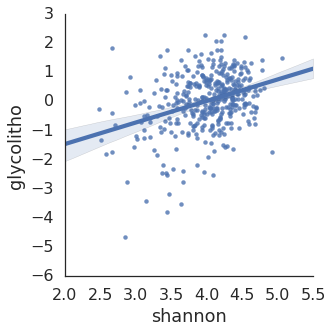

(0.33484376282329414, 6.568832660054047e-12)


In [10]:
discovery_mets['glycolitho']=X['root.metabolite.scaled.lipid.secondary_bile_acid_metabolism.glycolithocholate sulfate*:scaled']
sns.set(font_scale=1,context='poster',font='Arial',style='white')
plt.figure(figsize=[20,20], dpi=200)
ax=sns.lmplot('shannon','glycolitho', discovery_mets,palette='Set1',fit_reg=True)
ax.set_axis_labels('shannon', 'glycolitho')
plt.show()
print(scipy.stats.pearsonr(discovery_mets['shannon'],discovery_mets['glycolitho']))